# Importing packages

In [690]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

# Uploading the data and understanding it

In [691]:
df = pd.read_csv('/content/FuelConsumptionCo2.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [692]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [693]:
df.shape

(1067, 13)

In [694]:
df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS']].describe()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


# Creating a new dataset from the old one 

In [695]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


# Data visualizations

<Figure size 432x504 with 0 Axes>

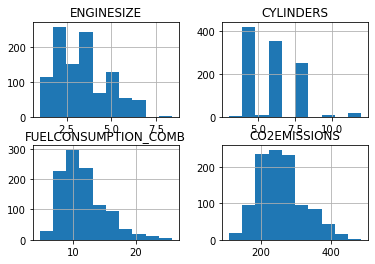

In [696]:
plt.figure(figsize=(6,7))
cdf.hist()
plt.show()

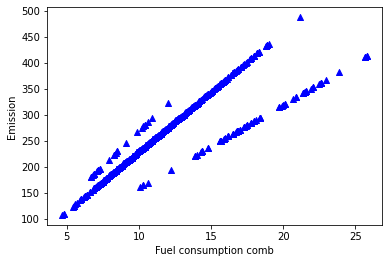

In [697]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue', marker='^')
plt.xlabel("Fuel consumption comb")
plt.ylabel("Emission")
plt.show()

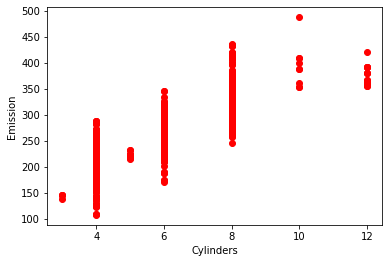

In [698]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='red')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

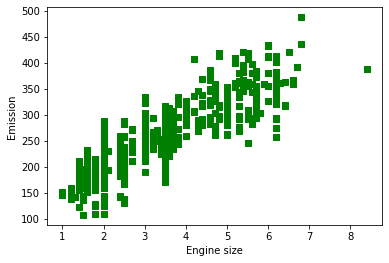

In [699]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='green', marker='s')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

# Simple regression model (method 1)

In [700]:
# Split the data for training and testing
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

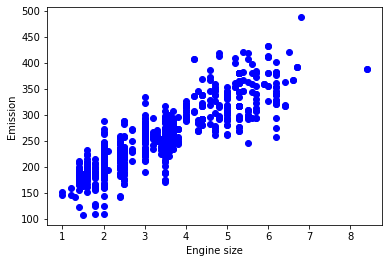

In [701]:
# use scatterplot to visualise the training data
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [702]:
# Break down training data into features and labels
train_x = np.asanyarray(train[['FUELCONSUMPTION_COMB']]) 
train_y = np.asanyarray(train[['CO2EMISSIONS']])

In [703]:
# Import libraries for linear regression and creating class
from sklearn import linear_model
regr = linear_model.LinearRegression()

In [704]:
# Fit the training set
regr.fit(train_x, train_y)

LinearRegression()

In [705]:
# Print the coefficient of linear regression
print ('Coefficients: ', regr.coef_)                                            # it is the slope
print ('Intercept: ',regr.intercept_)                                           # it is the intercept 

Coefficients:  [[15.92210897]]
Intercept:  [71.40701984]


Text(0, 0.5, 'Emission')

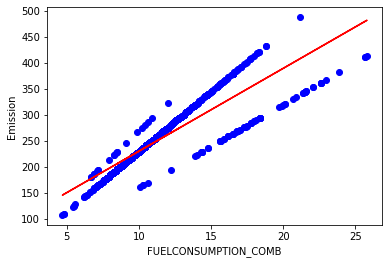

In [706]:
# Fit the regression line in the figure
plt.scatter(train.FUELCONSUMPTION_COMB, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")

In [707]:
# Break down testing data into features and labels
test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

In [708]:
# Predict the model
test_y_ = regr.predict(test_x)

In [709]:
# Check that how good is the model
from sklearn.metrics import r2_score
print("Mean absolute error (MAE): %.2f" % np.mean(np.absolute(test_y_ - test_y))) # MAE: Mean of absolute va;ue of errors 
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))   # MSE: Mean of squared errors
print("R2-score: %.2f" % r2_score(test_y , test_y_) )                             # R-squared: Metric to measure the performance of regression model

Mean absolute error (MAE): 20.14
Residual sum of squares (MSE): 764.90
R2-score: 0.83


# Simple regression model (method 2)

In [710]:
# Seperating features and labels
X = cdf.iloc[:,2:3].values
Y = cdf.iloc[:,-1].values

In [711]:
# Seperating training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [712]:
# Import libraries for linear regression and creating class
from sklearn import linear_model
regr = linear_model.LinearRegression()

In [713]:
# Fit the training set
regr.fit(X_train, y_train)

LinearRegression()

In [714]:
# Print the coefficient of linear regression
print ('Coefficients: ', regr.coef_)                                            # it is the slope
print ('Intercept: ',regr.intercept_)                                           # it is the intercept 

Coefficients:  [15.72196167]
Intercept:  73.44517542067916


In [715]:
# Predict the model
y_test_ = regr.predict(X_test)

In [716]:
# Check that how good is the model
from sklearn.metrics import r2_score
print("Mean absolute error (MAE): %.2f" % np.mean(np.absolute(y_test_ - y_test))) # MAE: Mean of absolute va;ue of errors 
print("Residual sum of squares (MSE): %.2f" % np.mean((y_test_ - y_test) ** 2))   # MSE: Mean of squared errors
print("R2-score: %.2f" % r2_score(y_test , y_test_) )                             # R-squared: Metric to measure the performance of regression model

Mean absolute error (MAE): 21.23
Residual sum of squares (MSE): 803.95
R2-score: 0.83
